**[Step 0]** 

Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from google.colab import drive

In [ ]:
# Mount google drive
google_drive_path = '/content/gdrive/'
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
# Load dataset
dataset_path = google_drive_path + 'MyDrive/[CS376]_Assignment1/data.csv'
df = pd.read_csv(dataset_path, sep='|')
print(df.head(5))

# Split dataset
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values # column 'Target'
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=35 )
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

          0    1         2    3  ...       101       102       103    Target
0  0.002399  0.0  0.236437  0.0  ...  1.000000  0.399283  0.159427  0.646667
1  0.000301  0.0  0.173387  0.0  ...  0.996171  0.186728  0.035001  0.686667
2  0.058396  0.0  0.646628  1.0  ...  0.992600  0.268042  0.072382  0.756667
3  0.002782  0.0  0.236437  0.0  ...  1.000000  0.802428  0.643891  0.480000
4  0.032794  0.0  0.700880  0.0  ...  0.365748  0.134839  0.049710  0.833333

[5 rows x 105 columns]
(354, 104) (152, 104) (354,) (152,)


**[Step 1]**

Implement the ridge regression model

In [ ]:
class RidgeRegression():
  def __init__(self, regularization_factor):
    # When regularization_factor (or lambda) is equal to 0, the model becomes a linear model
    self.regularization_factor = regularization_factor
  
  # Function for training
  def fit(self, X, Y, epochs, learning_rate, batch_size):
    num_examples, num_features = X.shape
    
    # Init weights and biases
    self.W = np.random.rand( num_features )
    self.b = 0

    # List for recording losses during training
    self.train_loss = []
    
    # Variable that supports training with Mini-batch or Stochastic Gradient Descent 
    # If batch_size is equal to the number of examples, the model is trained with Full-batch Gradient Descent
    num_iterations_per_epoch = int( num_examples / batch_size )

    for ep in range( epochs ):
      # Shuffle for Mini-batch or Stochastic Gradient Descent 
      if num_iterations_per_epoch != 1:
        df_tmp = pd.concat( [pd.DataFrame(X), pd.DataFrame(Y) ], axis=1 ).sample( frac=1 )
        X = df_tmp.iloc[:, :-1].values
        Y = df_tmp.iloc[:, -1].values
      
      # Start training
      for i in range( num_iterations_per_epoch ):
        X_batch = X[ batch_size*i : batch_size * (i+1) ]
        Y_batch = Y[ batch_size*i : batch_size * (i+1) ]

        # Get gradients
        dW, db = self.calculate_gradient(X_batch, Y_batch)

        # Update weights and bias
        self.W = self.W - learning_rate * dW
        self.b = self.b - learning_rate * db

      # Record the loss per epoch
      loss = self.calculate_loss(X, Y)
      self.train_loss.append(loss)

    return self

  # Function for prediction
  def predict(self, X):
    return X.dot( self.W ) + self.b

  # Function for calculating the gradient
  # Objective function: PPT
  def calculate_gradient(self, X, Y):
    num_examples = X.shape[0]
    # Get predictions
    Y_pred = self.predict(X)
    # Calculate gradients
    regularization_term = 2 * ( self.regularization_factor * self.W )
    dW = - ( ( X.T ).dot( Y - Y_pred ) ) / num_examples + regularization_term
    db = - np.sum( Y - Y_pred ) / num_examples
    return dW, db

  # Function for calculating the loss
  # Objective function: PPT
  def calculate_loss(self, X, Y):
    num_examples = X.shape[0]
    # Get predictions
    Y_pred = self.predict(X)
    # Calculate loss
    regularization_term = self.regularization_factor * np.sum( np.square( self.W ) )
    loss = np.sum( np.square ( Y - Y_pred ) ) / ( 2 * num_examples ) + regularization_term
    return loss

  # Function for evaluation
  # Metric: Root Mean Square Error (RMSE)
  def eval(self, X, Y):
    num_examples = X.shape[0]
    # Get predictions
    Y_pred = self.predict(X)
    # Calcuate RMSE
    RMSE = np.sqrt( np.sum( np.square( Y_pred - Y ) ) / num_examples )
    return RMSE

[Step 2]

Train a model on the given dataset, and evaluate the model

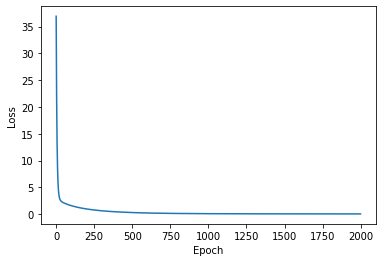

Root Mean Square Error (Test):  0.22607383361488978


In [ ]:
# Init
regularization_factor = 0.1
ridge_model = RidgeRegression( regularization_factor )

# Train 
epochs = 2000
learning_rate = 0.01
batch_size = X_train.shape[0] # Full-batch
ridge_model.fit( X_train, Y_train, epochs, learning_rate, batch_size )

# Plot loss graph
loss = ridge_model.train_loss
x_axis = np.arange(0, len(loss))
plt.plot(x_axis, loss, label='Ridge')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate
print("Root Mean Square Error (Test): ", ridge_model.eval( X_test, Y_test ))

**[Step 3]**

Train 3 models with different gradient descent methods, and compare their loss graphs: (full) Batch, Mini-Batch, Stochastic

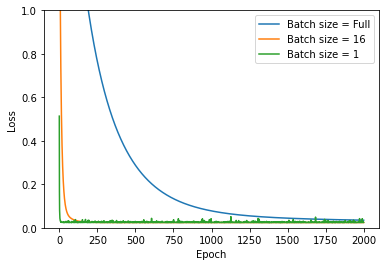

(0.22607383361488978, 0.2147921585242702, 0.22218498088575542)

In [ ]:
# Init
regularization_factor = 0.1
ridge_model_full = RidgeRegression( regularization_factor )
ridge_model_16 = RidgeRegression( regularization_factor )
ridge_model_1 = RidgeRegression( regularization_factor )

# Train 
epochs = 2000
learning_rate = 0.01

ridge_model_full = ridge_model # Trained model in step 2

batch_size = 16
ridge_model_16.fit( X_train, Y_train, epochs, learning_rate, batch_size )

batch_size = 1
ridge_model_1.fit( X_train, Y_train, epochs, learning_rate, batch_size )

# Plot loss graph
loss_full, loss_16, loss_1 = ridge_model_full.train_loss, ridge_model_16.train_loss, ridge_model_1.train_loss
x_axis = np.arange(0, len(loss_full))
plt.plot(x_axis, loss_full, label='Batch size = Full')
plt.plot(x_axis, loss_16, label='Batch size = 16')
plt.plot(x_axis, loss_1, label='Batch size = 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()
plt.show()

# Evaluate
ridge_model_full.eval( X_test, Y_test ), ridge_model_16.eval( X_test, Y_test ), ridge_model_1.eval( X_test, Y_test )

**[Step 4]**

Train 4 models with different regularization factors, and compare the distributions of weights: 10, 1, 0.1, 0

In [ ]:
# Init
ridge_model_rf10 = RidgeRegression( regularization_factor = 10 )
ridge_model_rf1 = RidgeRegression( regularization_factor = 1 )
ridge_model_rf01 = RidgeRegression( regularization_factor = 0.1 )
ridge_model_rf0 = RidgeRegression( regularization_factor = 0 ) # Linear model

# Train
batch_size = X_train.shape[0] # Full-batch
ridge_model_rf10.fit( X_train, Y_train, epochs, learning_rate, batch_size )
ridge_model_rf1.fit( X_train, Y_train, epochs, learning_rate, batch_size )
ridge_model_rf01.fit( X_train, Y_train, epochs, learning_rate, batch_size )
ridge_model_rf0.fit( X_train, Y_train, epochs, learning_rate, batch_size )

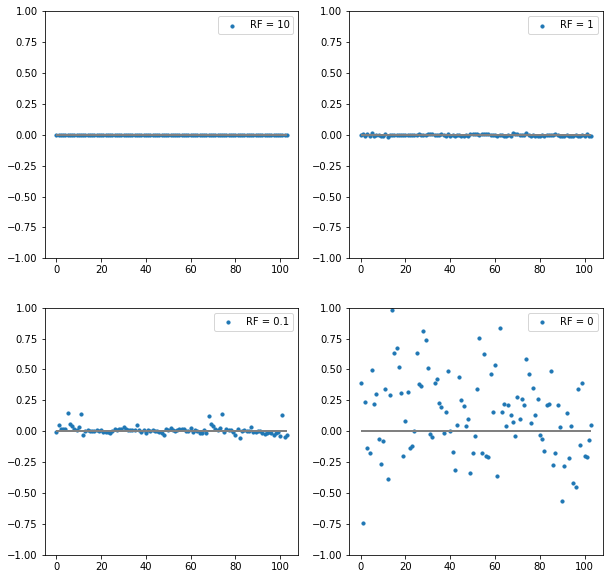

In [ ]:
# Visualize
num_features = X_train.shape[1]
x_axis = np.arange(0, num_features)
plt.figure(figsize=(10,10))

# Regularization factor = 10
plt.subplot(2, 2, 1)
plt.hlines(0,x_axis[0], x_axis[-1], color='gray', linewidth = 2)
plt.scatter(x_axis, ridge_model_rf10.W, s=10, label = 'RF = 10')
plt.ylim(-1,1)
plt.legend()

# Regularization factor = 1
plt.subplot(2, 2, 2)
plt.hlines(0,x_axis[0], x_axis[-1], color='gray', linewidth = 2)
plt.scatter(x_axis, ridge_model_rf1.W, s=10, label = 'RF = 1')
plt.ylim(-1,1)
plt.legend()

# Regularization factor = 0.1
plt.subplot(2, 2, 3)
plt.hlines(0,x_axis[0], x_axis[-1], color='gray', linewidth = 2)
plt.scatter(x_axis, ridge_model_rf01.W, s=10, label = 'RF = 0.1')
plt.ylim(-1,1)
plt.legend()

# Regularization factor = 0 (Linear model)
plt.subplot(2, 2, 4)
plt.hlines(0,x_axis[0], x_axis[-1], color='gray', linewidth = 2)
plt.scatter(x_axis, ridge_model_rf0.W, s=10, label = 'RF = 0')
plt.ylim(-1,1)
plt.legend()

In [ ]:
# Evaluate
print("RF 10 : ", ridge_model_rf10.eval( X_test, Y_test ))
print("RF 1 : ", ridge_model_rf1.eval( X_test, Y_test ))
print("RF 0.1 : ", ridge_model_rf01.eval( X_test, Y_test ))
print("RF 0 (Linear): ", ridge_model_rf0.eval( X_test, Y_test ))

RF 10 :  0.32785687211659154
RF 1 :  0.2863526682551781
RF 0.1 :  0.22782633648849757
RF 0 (Linear):  0.3036531934278245


**[Step 5]**

Use PCA to reduce the number of features in the dataset, and show that reducing the complexity of the models can lead to improved performance

In [ ]:
# Calculate the cumulative explained variances
X = df.iloc[:, :-1].values
pca_test = PCA(n_components = X.shape[1])
pca_test.fit(X)
print("Eigen values: ", pca_test.explained_variance_)
print("Cumulative explained variances:")
for i in range(1, len(pca_test.explained_variance_) + 1):
  print("# PCs = {}: {}".format(i, round(sum(pca_test.explained_variance_ratio_[:i]), 2)))

Eigen values:  [2.22589226e+00 4.40515177e-01 3.21192200e-01 2.72663946e-01
 1.78300259e-01 1.35610191e-01 1.07982230e-01 9.65186630e-02
 5.44386765e-02 4.18622255e-02 3.31410169e-02 3.06269904e-02
 2.81723096e-02 1.57294115e-02 1.03481136e-02 8.91624547e-03
 6.60703122e-03 6.00619478e-03 5.86515506e-03 4.60443557e-03
 4.31885093e-03 3.76523348e-03 3.43443195e-03 3.25843029e-03
 2.65951861e-03 2.53573447e-03 2.18381151e-03 1.99270063e-03
 1.66607389e-03 1.52645712e-03 1.37378854e-03 1.16145824e-03
 1.03606736e-03 1.00945344e-03 9.30525671e-04 8.42394004e-04
 7.49076729e-04 7.07582757e-04 6.73684077e-04 6.40692670e-04
 5.81144332e-04 5.60802923e-04 4.80909352e-04 4.60638213e-04
 4.12214541e-04 3.69460190e-04 3.57677240e-04 3.42529992e-04
 3.34383881e-04 3.03002493e-04 2.80973996e-04 2.57857295e-04
 2.44375934e-04 2.35373603e-04 2.29754227e-04 1.98144143e-04
 1.80874051e-04 1.66717653e-04 1.61883146e-04 1.46850597e-04
 1.40564795e-04 1.36693773e-04 1.33177088e-04 1.20159441e-04
 1.114721

In [ ]:
# Check the above result and determine the number of principal components
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
pca.fit(X)

# Make a dataset with new features
X2_train = pca.transform(X_train)
X2_test = pca.transform(X_test)
Y2_train, Y2_test = Y_train, Y_test
X2_train.shape, X2_test.shape, Y2_train.shape, Y2_test.shape

((354, 8), (152, 8), (354,), (152,))

In [ ]:
# Init
ridge_model_rf01 = RidgeRegression( regularization_factor = 0.1 )
ridge_model_rf0 = RidgeRegression( regularization_factor = 0 ) # Linear model

# Train
epochs = 2000
learning_rate = 0.01
ridge_model_rf01.fit( X2_train, Y2_train, epochs, learning_rate, batch_size )
ridge_model_rf0.fit( X2_train, Y2_train, epochs, learning_rate, batch_size )

# Evaluate
print("Ridge : ", ridge_model_rf01.eval( X2_test, Y2_test ))
print("Linear : ", ridge_model_rf0.eval( X2_test, Y2_test ))

Ridge :  0.22015771241141036
Linear :  0.18687985377989405
